# Random Forest (Classification) using Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [9]:
golf = pd.read_csv("D:/12320158/Datasets/Golf.csv")

label_encoders = {}
for column in golf.columns[:-1]:
    le = LabelEncoder()
    golf[column] = le.fit_transform(golf[column])
    label_encoders[column] = le

y_encoder = LabelEncoder()
golf[golf.columns[-1]] = y_encoder.fit_transform(golf[golf.columns[-1]])

X = golf.iloc[:, :-1].values
y = golf.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
rf_clf = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}')


Accuracy: 66.67%
MSE: 0.3333, RMSE: 0.5774, R² Score: -0.5000


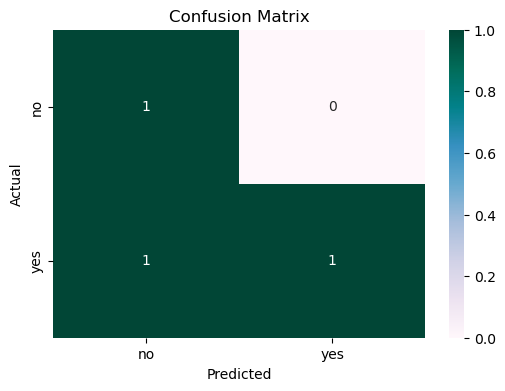

In [13]:
# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBuGn', xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()